# Retrieval of age and bulk properties of a planetary system

In this tutorial, we will retrieve the age and bulk parameters of the two planets in the [beta Pictoris](https://en.wikipedia.org/wiki/Beta_Pictoris) system. To do so, we will simultaneously fit the bolometric luminosities of the planets with a grid of cooling curves, while including their dynamical masses as prior information.

## Getting started

We start by setting the library path of ``MultiNest`` (see [installation instructions](https://johannesbuchner.github.io/PyMultiNest/install.html#building-the-libraries)).

In [1]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/Users/tomasstolker/applications/MultiNest/lib'

We also need to import [numpy](https://numpy.org) and the `species` toolkit.

In [2]:
import numpy as np
import species

A workflow is initiated by running the [SpeciesInit](https://species.readthedocs.io/en/latest/species.core.html#species.core.init.SpeciesInit) class. By doing so, both the [configuration file](https://species.readthedocs.io/en/latest/configuration.html) and the [HDF5 database](https://species.readthedocs.io/en/latest/database.html) are created in the working folder.

In [3]:
species.SpeciesInit()

Initiating species v0.5.2... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Grid interpolation method: linear
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding evolutionary data to the database

Data can be added to the [HDF5 database](https://species.readthedocs.io/en/latest/database.html) by first creating an instance of the [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) class.

In [4]:
database = species.Database()

The [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) object has a number of methods to read and write data. We will use the [add_evolution](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_evolution) method for adding the grid with bolometric luminosities. Running the method will download the grid to the `data_folder` (see [configuration file](https://species.readthedocs.io/en/latest/configuration.html)) except if the data was already present. After downloading, the grid and parameter points will be imported into the database.

In [5]:
database.add_evolution()

Adding grid with evolution data:
   - Luminosity grid shape: (500, 71, 71, 3, 5, 2)
   - Radius grid shape: (500, 71, 71, 3, 5, 2)
   - Number of age points = 500, from 1e-06 to 300.0
   - Number of mass points = 71, from 5.0 to 40.0
   - Number of s_i points = 71, from 7.0 to 14.0
   - Number of d_frac points = 3, from 2e-06 to 0.0002
   - Number of y_frac points = 5, from 0.25 to 0.4
   - Number of m_core points = 2, from 0.0 to 40.0


## Retrieving the age and bulk properties of the beta Pictoris planets

Now that the required data is included in the database, we create an instance of the [PlanetEvolution](https://species.readthedocs.io/en/latest/species.analysis.html#species.analysis.evolution.PlanetEvolution) class, which will be used for the estimation of the age and bulk properties of the two planets in the beta Pictoris system. We need to provide a list with the bolometric luminosities, $\log{L/L_\odot}$, and their uncertainties. Such values are typically estimated by fitting the spectral energy distribution with a grid of model spectra (e.g. using [FitModel](https://species.readthedocs.io/en/latest/species.analysis.html#species.analysis.fit_model.FitModel); see also the related [tutorial](https://species.readthedocs.io/en/latest/tutorials/fitting_model_spectra.html)). Optionally, we can also provide prior knowledge on the masses and/or radii of the planets, which will be used as priors during the parameter estimation. In this case, we adopt the dynamically-measured masses of both planets. Finally, boundaries of the parameter priors can be provided as dictionary to the `bounds` parameter. In this case, we limit the initial entropy, $S_i$, to values larger than 9.0 $k_\mathrm{b}/\mathrm{baryon}$.

In [6]:
evolution = species.PlanetEvolution(object_lbol=[(-3.76, 0.02), (-4.46, 0.02)],
                                    object_mass=[(9.8, 2.7), (8.3, 1.1)],
                                    object_radius=None,
                                    bounds={'s_i': (9., 14.)})

Now we can run the parameter estimation by calling the [run_multinest](https://species.readthedocs.io/en/latest/species.analysis.html#species.analysis.evolution.PlanetEvolution.run_multinest) method. The nested sampling algorithm of the [PyMultiNest](https://johannesbuchner.github.io/PyMultiNest/index.html) package is used for sampling the posterior distributions and estimating the marginalized likelihood. We will run the nested sampling with 2000 live points and store the results in the database at the name `tag` that is provided. The `output` folder is the location where the output created by [MultiNest](https://github.com/farhanferoz/MultiNest) will be stored.

In [7]:
evolution.run_multinest(tag='betapic',
                        n_live_points=2000,
                        output='multinest/')

Fitting 11 parameters:
   - age
   - mass_0
   - s_i_0
   - d_frac_0
   - y_frac_0
   - m_core_0
   - mass_1
   - s_i_1
   - d_frac_1
   - y_frac_1
   - m_core_1
Prior boundaries:
   - age = (1e-06, 300.0000000000001)
   - mass_0 = (5.0, 40.0)
   - mass_1 = (5.0, 40.0)
   - s_i_0 = (9.0, 14.0)
   - s_i_1 = (9.0, 14.0)
   - d_frac_0 = (-5.698970004336019, -3.6989700043360187)
   - d_frac_1 = (-5.698970004336019, -3.6989700043360187)
   - y_frac_0 = (0.25, 0.4)
   - y_frac_1 = (0.25, 0.4)
   - m_core_0 = (0.0, 40.0)
   - m_core_1 = (0.0, 40.0)
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points = 2000
 dimensionality =   11
 *****************************************************


/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/pymultinest/run.py:208: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  nargs = len(inspect.getargspec(LogLikelihood).args) - inspect.ismethod(LogLikelihood)


  analysing data from multinest/.txt ln(ev)=  -8.3659839438358947      +/-   6.0943345930881930E-002
 Total Likelihood Evaluations:        68335
 Sampling finished. Exiting MultiNest

Nested sampling global log-evidence: -8.37 +/- 0.06
Nested importance sampling global log-evidence: -10.16 +/- 0.28
Sample with the highest likelihood:
   - Log-likelihood = -0.00
   - age = 22.77
   - mass_0 = 12.49
   - s_i_0 = 10.90
   - d_frac_0 = -3.99
   - y_frac_0 = 0.28
   - m_core_0 = 4.35
   - mass_1 = 7.68
   - s_i_1 = 11.20
   - d_frac_1 = -4.50
   - y_frac_1 = 0.38
   - m_core_1 = 25.31
  analysing data from multinest/.txt
Nested sampling global log-evidence: -8.37 +/- 0.06
Nested importance sampling global log-evidence: -10.16 +/- 0.28
Sample with the highest likelihood:
   - Log-likelihood = -0.00
   - age = 22.77
   - mass_0 = 12.49
   - s_i_0 = 10.90
   - d_frac_0 = -3.99
   - y_frac_0 = 0.28
   - m_core_0 = 4.35
   - mass_1 = 7.68
   - s_i_1 = 11.20
   - d_frac_1 = -4.50
   - y_frac_1 = 

## Plotting the posterior distribution

The samples from the parameter estimation have been stored in the database. We can now run the [plot_posterior](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_mcmc.plot_posterior) function to plot the 1D and 2D projections of the posterior distributions by making use of [corner.py](https://corner.readthedocs.io). Here we specify the database tag with the results from [run_multinest](https://species.readthedocs.io/en/latest/species.analysis.html#species.analysis.evolution.PlanetEvolution.run_multinest). Running this function on a set of samples from [PlanetEvolution](https://species.readthedocs.io/en/latest/species.analysis.html#species.analysis.evolution.PlanetEvolution) will also include the posterior of several derived parameters ($T_\mathrm{eff}$, $R$, and $\log{g}$).

Median sample:
   - age = 2.44e+01
   - mass_0 = 1.24e+01
   - s_i_0 = 1.22e+01
   - d_frac_0 = -4.56e+00
   - y_frac_0 = 3.47e-01
   - m_core_0 = 1.85e+01
   - mass_1 = 8.27e+00
   - s_i_1 = 1.21e+01
   - d_frac_1 = -4.69e+00
   - y_frac_1 = 3.25e-01
   - m_core_1 = 2.17e+01
Calculating the posteriors of Teff, R, and log(g)...


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6824 [00:00<?, ?it/s]

  0%|          | 0/6824 [00:00<?, ?it/s]

Plotting the posterior...

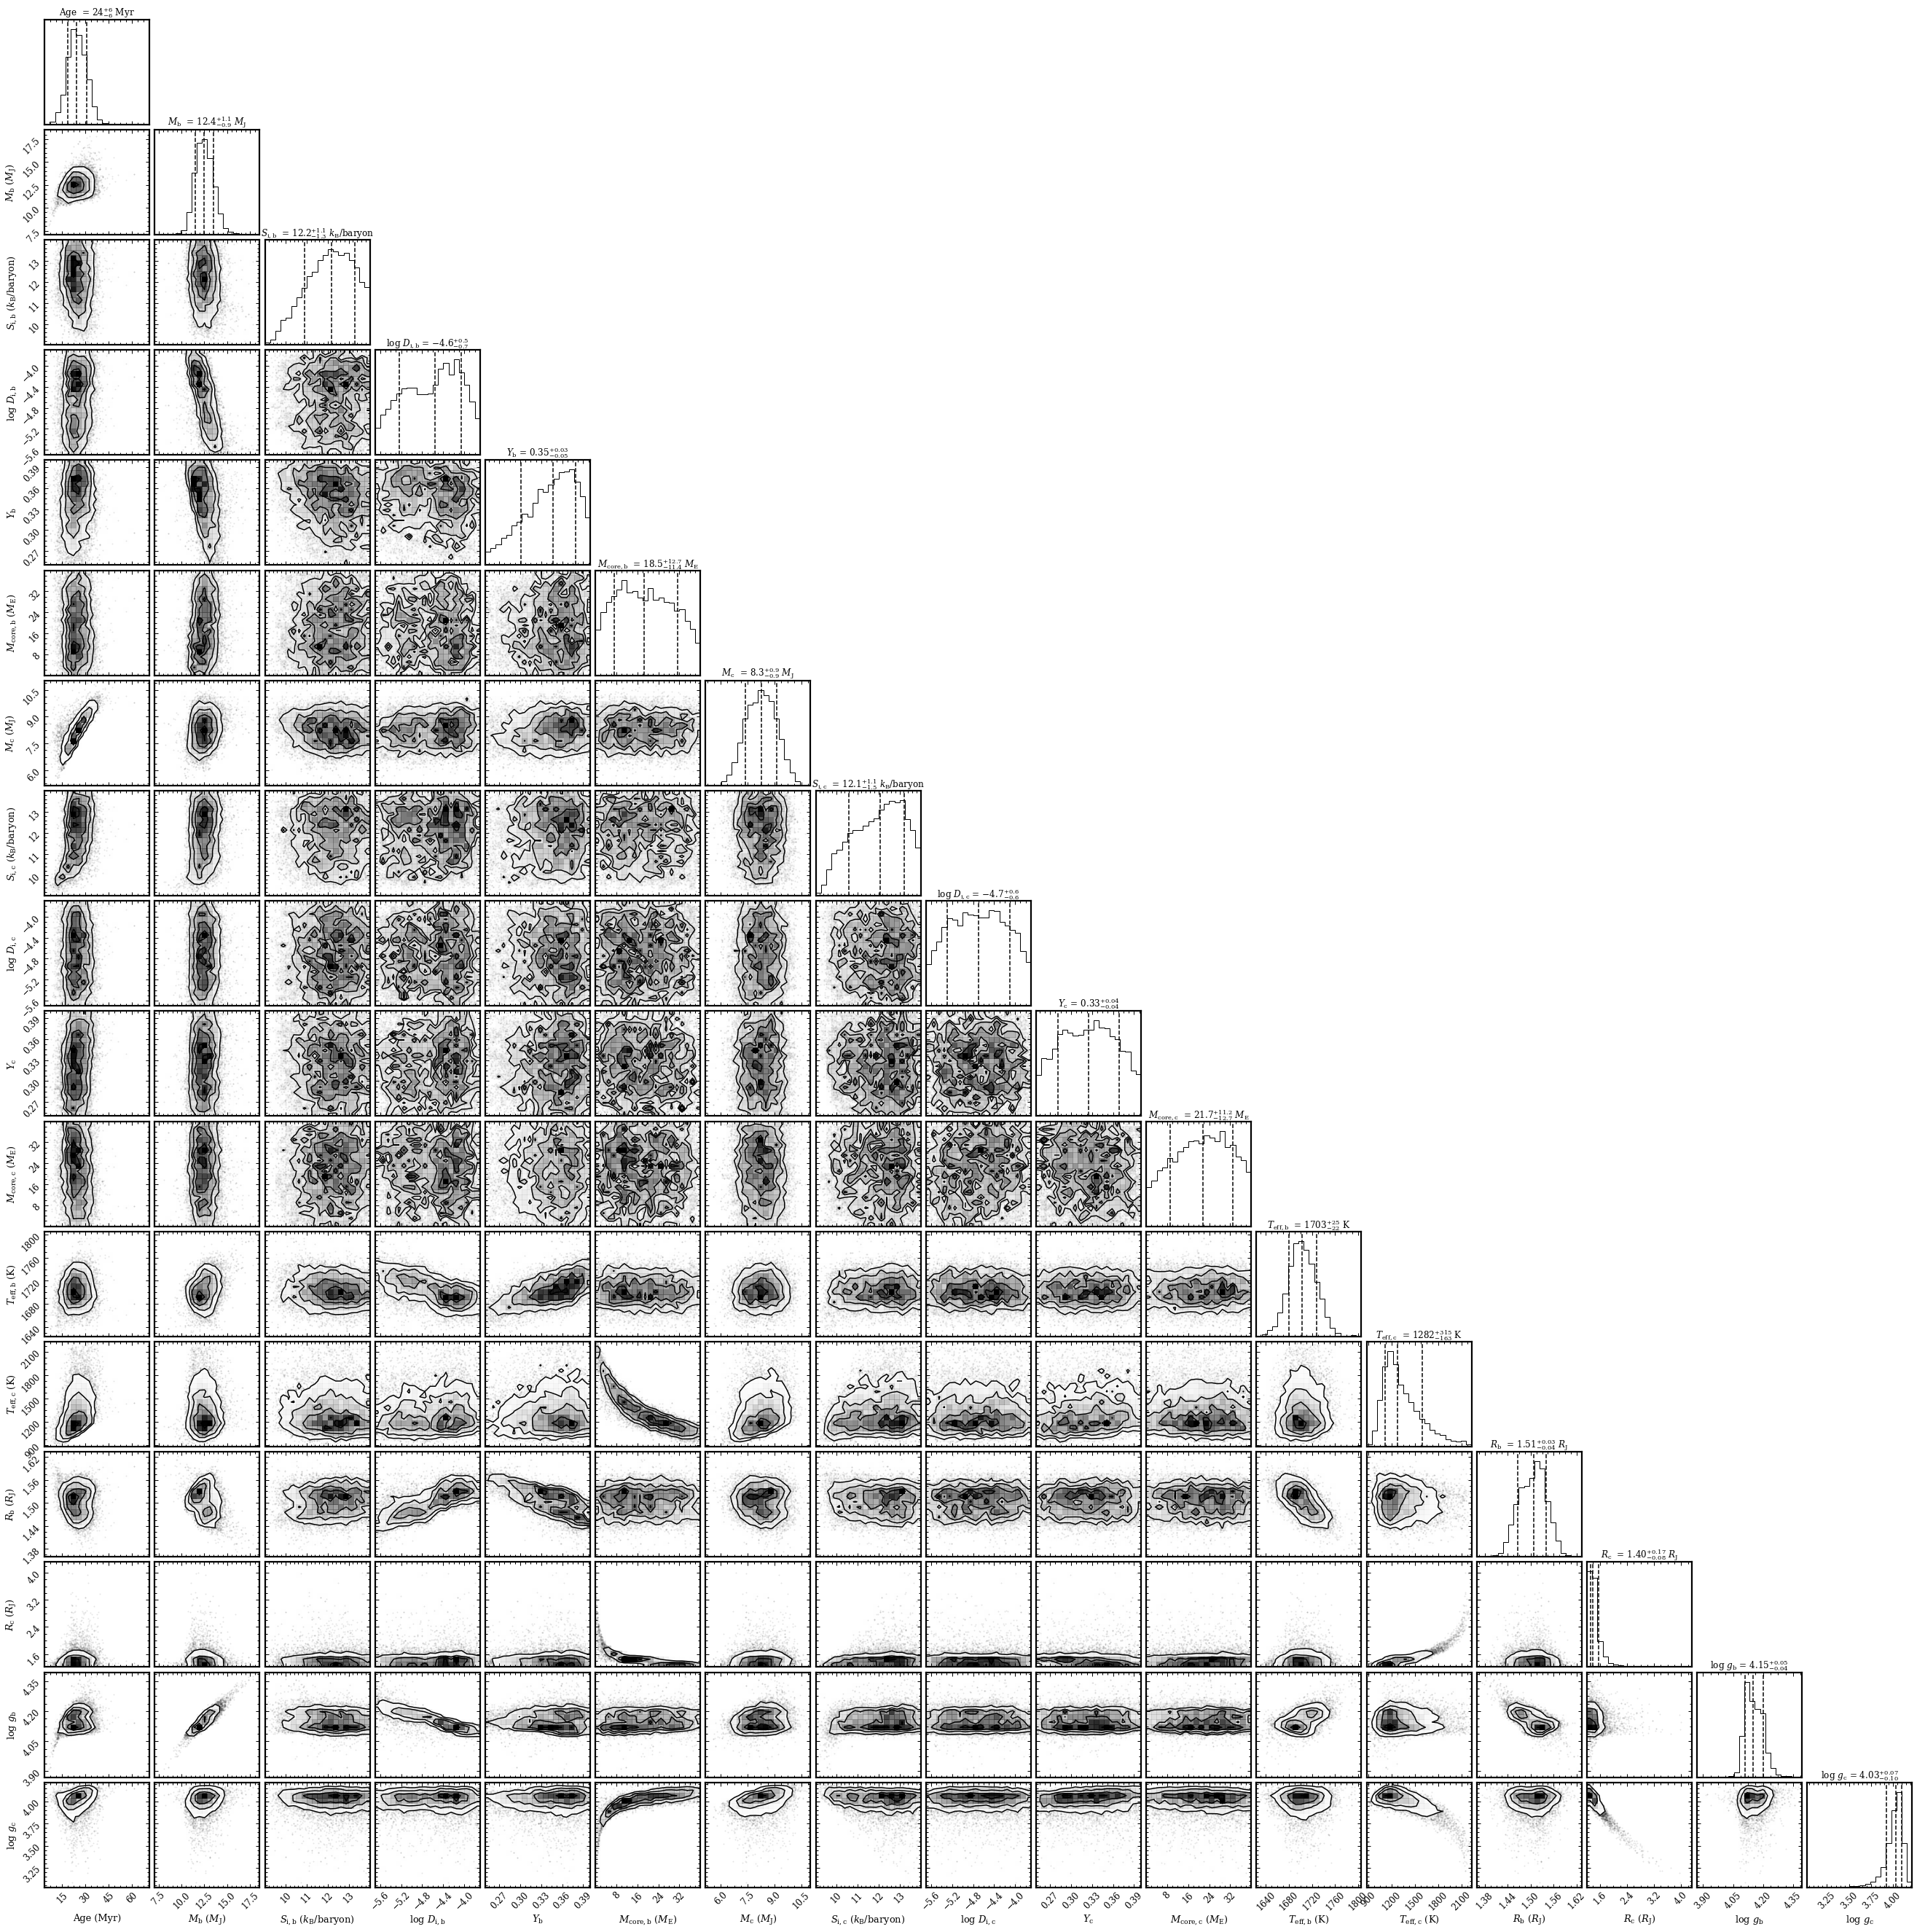

 [DONE]


In [8]:
species.plot_posterior(tag='betapic',
                       offset=(-0.25, -0.25),
                       title_fmt=['.0f', '.1f', '.1f', '.1f', '.2f', '.1f', '.1f', '.1f', '.1f', '.2f', '.1f', '.0f', '.0f', '.2f', '.2f', '.2f', '.2f'],
                       inc_loglike=False,
                       output=None)

## Plotting cooling curves and isochrones

From the posterior samples we can calculate random cooling curves with the [plot_cooling](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_evolution.plot_cooling) function. This is done by simply providing the name tag (i.e. that was used with [run_multinest](https://species.readthedocs.io/en/latest/species.analysis.html#species.analysis.evolution.PlanetEvolution)) of the samples as argument of `tag`. 

Plotting cooling curves...

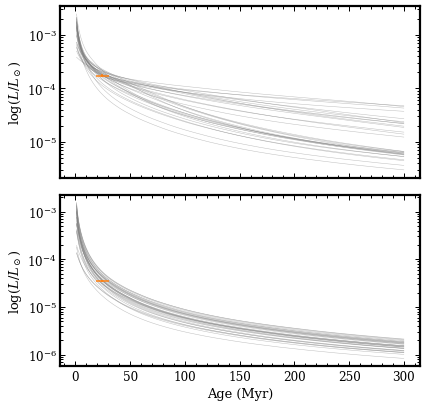

 [DONE]
Plotting cooling curves...

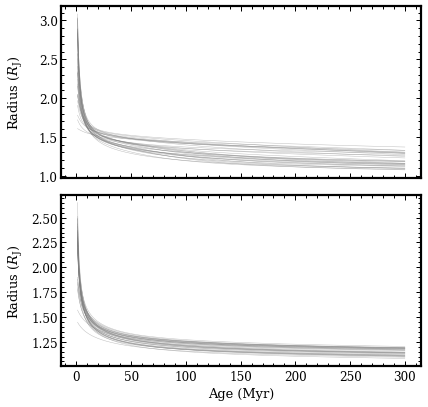

 [DONE]


In [9]:
species.plot_cooling(tag='betapic',
                     n_samples=30,
                     age_min=1.,
                     figsize=(5., 5.),
                     offset=(-0.12, -0.1),
                     xscale='linear',
                     output=None)

Similarly, we can draw random samples for plotting isochrones by using the [plot_isochrones](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_evolution.plot_cooling) function. Each isochrone is calculated from a single posterior sample, so the age and bulk parameters do not change along each isochrone.

Plotting isochrones...

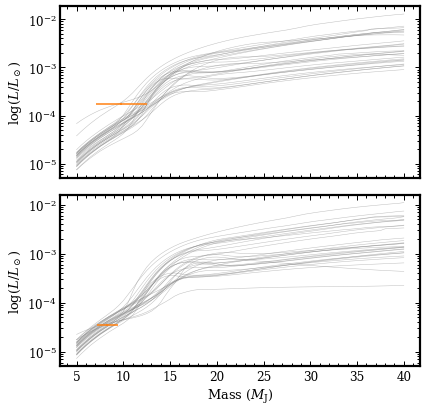

 [DONE]


In [10]:
species.plot_isochrones(tag='betapic',
                        n_samples=30,
                        figsize=(5., 5.),
                        offset=(-0.12, -0.1),
                        output=None)

## Extracting the posterior samples

The posterior samples have been stored in the HDF5 database. To extract these data, we can use the [get_samples](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.get_samples) method of the [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) class. Running the method will return as [SamplesBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SamplesBox). We will also write the samples to a JSON file.

In [11]:
sample_box = database.get_samples(tag='betapic',
                                  json_file='samples.json')

We can have a look at the content of the [SamplesBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SamplesBox) by using the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method.

In [12]:
sample_box.open_box()

Opening SamplesBox...
spectrum = evolution
parameters = ['age', 'mass_0', 's_i_0', 'd_frac_0', 'y_frac_0', 'm_core_0', 'mass_1', 's_i_1', 'd_frac_1', 'y_frac_1', 'm_core_1']
samples = [[26.86349156 12.30507709 13.09476421 ... -3.71154241  0.30334887
   3.85324688]
 [33.40147473 12.35508573 11.65414699 ... -4.61050142  0.38742693
   4.21492099]
 [15.56406978 11.12562814 13.21029348 ... -4.02595021  0.35872349
  29.79098154]
 ...
 [16.54217413 11.92905796 12.00872565 ... -4.81731905  0.29547969
  26.8795346 ]
 [21.94496006 12.14934419 13.83723644 ... -5.07867703  0.30672045
  22.7644496 ]
 [27.31408034 12.34424289 13.9480303  ... -4.6922939   0.35168044
  31.71127085]]
ln_prob = [-8.55267655 -8.05571198 -7.51602099 ... -0.2710147  -0.24881185
 -0.05217433]
ln_evidence = [-10.16130171   0.27501649]
prob_sample = None
median_sample = {'age': 24.397528725069016, 'mass_0': 12.429174557510326, 's_i_0': 12.164098931766077, 'd_frac_0': -4.556216685321972, 'y_frac_0': 0.3467488963254457, 'm_core

All the data in the [SamplesBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SamplesBox) can be accessed as object attributes. For example, to read the array with posterior samples:

In [13]:
print(type(sample_box.samples))
print(sample_box.samples.shape)

<class 'numpy.ndarray'>
(6824, 11)
